# Uploading data

In [ ]:
from google.colab import files
uploaded = files.upload()

# Reading the excel file
# Part a-1) use of info() function

In [ ]:
import pandas as pd
car_prices = pd.read_csv('CarPrice.csv')
car_prices.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

# Part a-2) Describe() for finding Min,Max, and Standard Deviation

In [ ]:
import numpy as np
price_column = car_prices['price']
car_prices.describe()


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# Part a-3) Correlation
the correlation among the features are first printed, after that the correlation matrix is printed.
In the end, the features with correlation less than -0.2 and more than 0.2 are harvested

car_ID             -0.109093
symboling          -0.079978
wheelbase           0.577816
carlength           0.682920
carwidth            0.759325
carheight           0.119336
curbweight          0.835305
enginesize          0.874145
boreratio           0.553173
stroke              0.079443
compressionratio    0.067984
horsepower          0.808139
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
CarName            -0.231439
fueltype           -0.105679
aspiration          0.177926
doornumber         -0.031835
carbody            -0.083976
drivewheel          0.577992
enginelocation      0.324973
enginetype          0.049171
cylindernumber     -0.027628
fuelsystem          0.526823
dtype: float64


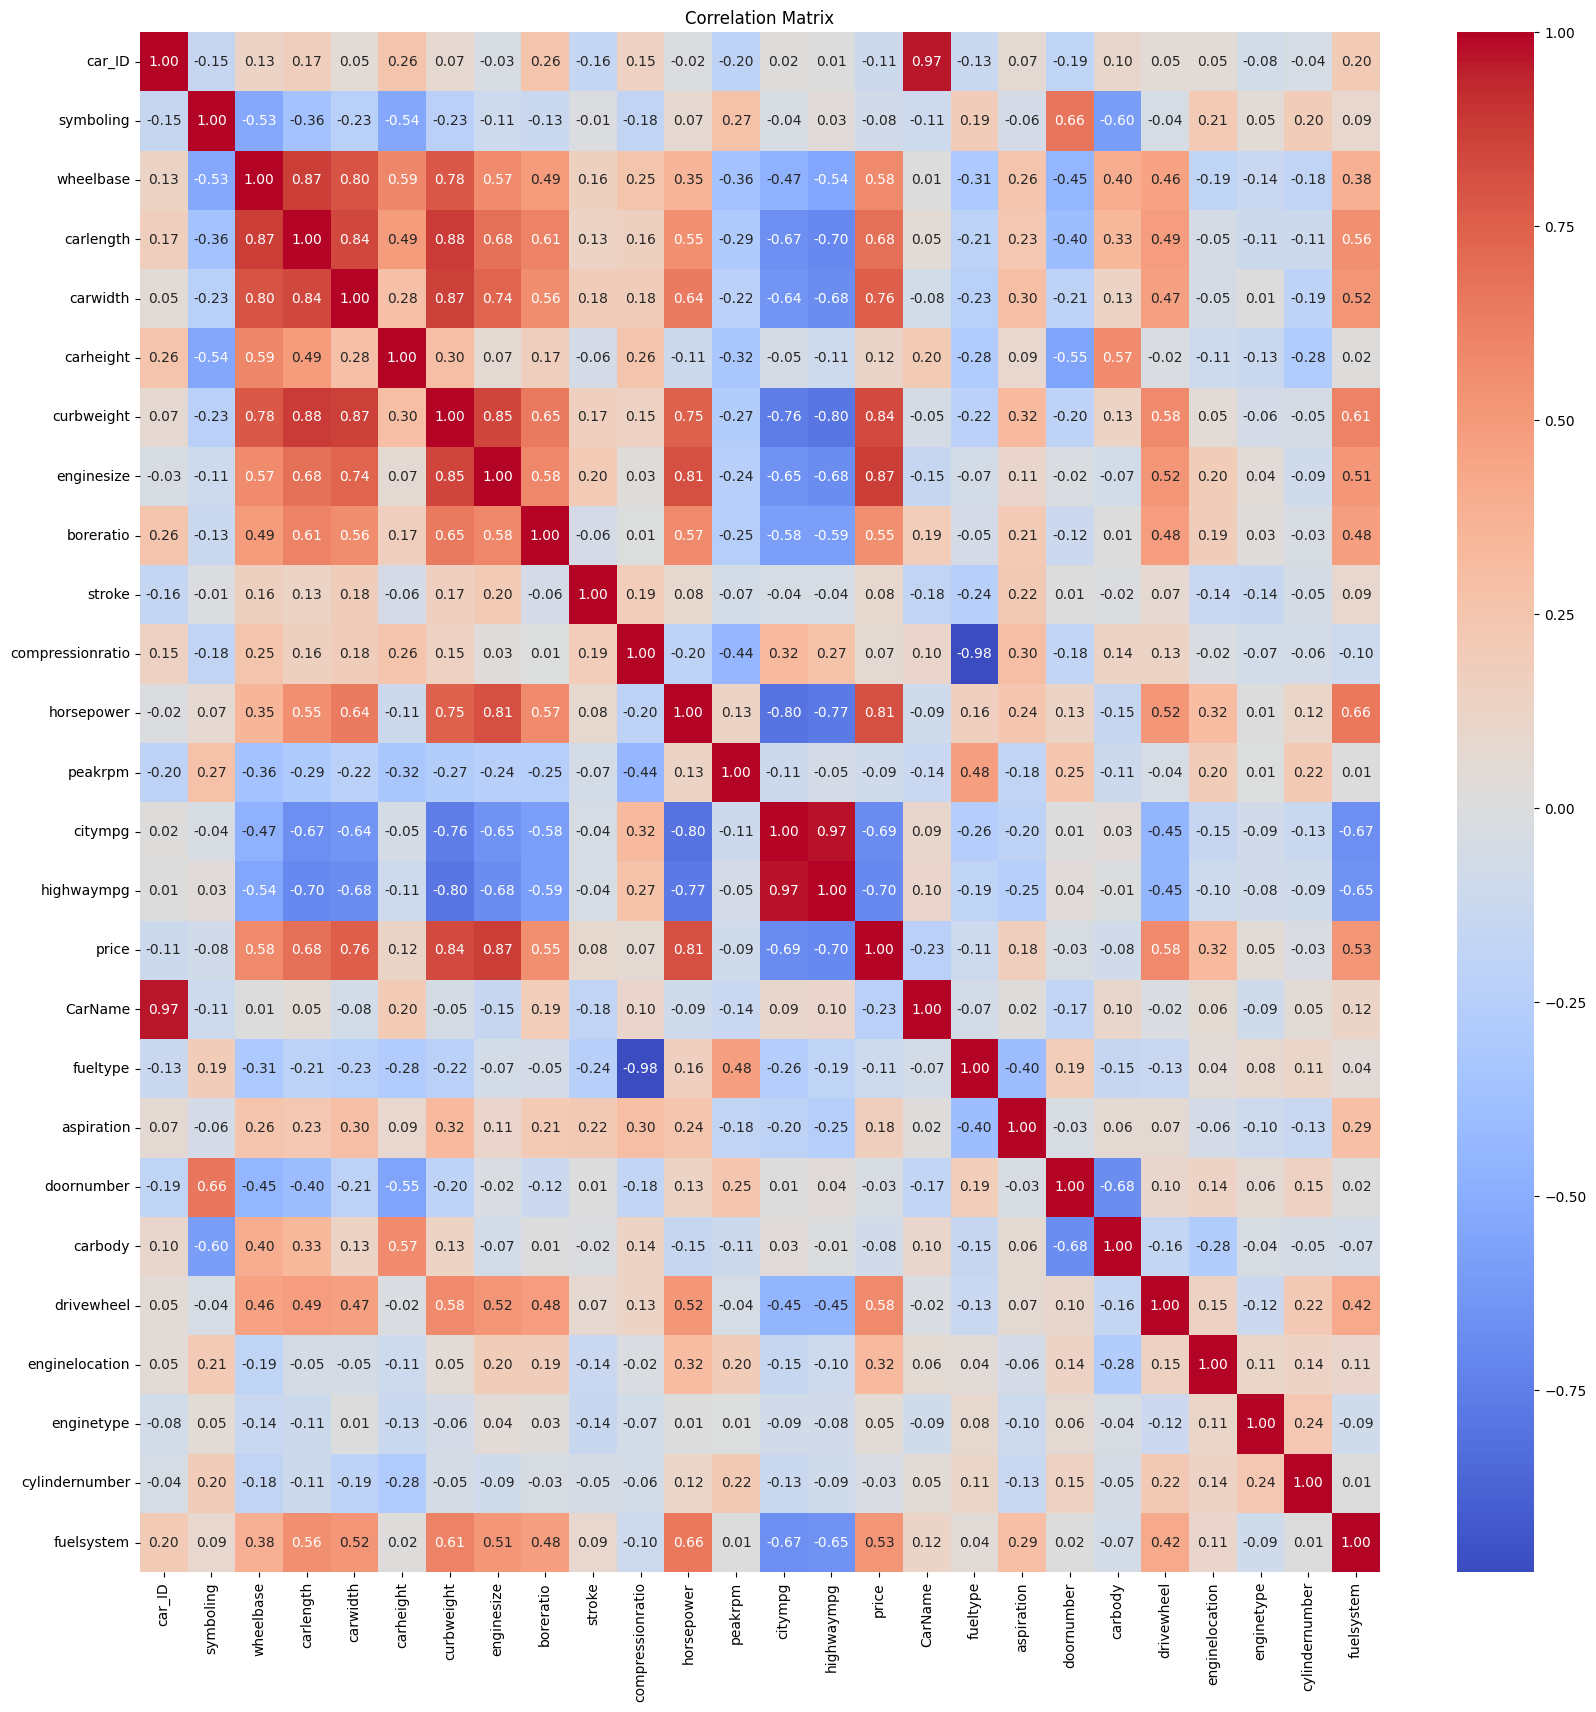

0          wheelbase
1          carlength
2           carwidth
3         curbweight
4         enginesize
5          boreratio
6         horsepower
7            citympg
8         highwaympg
9            CarName
10        drivewheel
11    enginelocation
12        fuelsystem
dtype: object


In [ ]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Encoding categorical features
categorical_features = car_prices.select_dtypes(include=['object'])
encoder = LabelEncoder()
encoded_categorical_features = categorical_features.apply(encoder.fit_transform)
# Combining encoded categorical features with numerical features
numerical_features = car_prices.select_dtypes(exclude=['object'])
# Reconstructing the Dataset
Reconstruct_Data = pd.concat([numerical_features, encoded_categorical_features], axis=1)
# Dropping the price column for the first correlation
Reconstruct_features = Reconstruct_Data.drop(['price'], axis=1)
correlation_results = Reconstruct_features.corrwith(price_column)
print(correlation_results)

correlation_results_wp = Reconstruct_Data.corr()

# Heatmap correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_results_wp, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

filtered_series = correlation_results[(correlation_results < -0.2) | (correlation_results > 0.2)]
index_labels = pd.Series(filtered_series.index.astype(str))
# Displaying the index labels of the chosen features
print(index_labels)

# Figure 1) Plotting the top 3 features with the most correlation with the prices

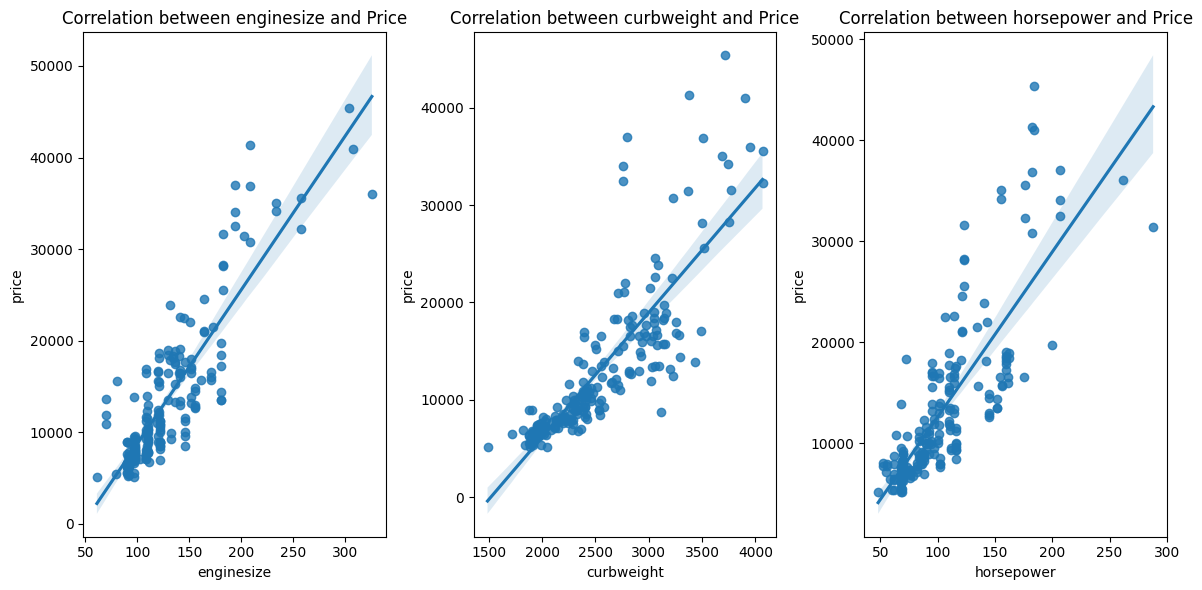

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.regplot(x='enginesize', y='price', data=car_prices)
plt.title('Correlation between enginesize and Price')

plt.subplot(1, 3, 2)
sns.regplot(x='curbweight', y='price', data=car_prices)
plt.title('Correlation between curbweight and Price')

plt.subplot(1, 3, 3)
sns.regplot(x='horsepower', y='price', data=car_prices)
plt.title('Correlation between horsepower and Price')
plt.tight_layout()

# Show the plots
plt.show()

# Plotting the correlation between Price and carheight

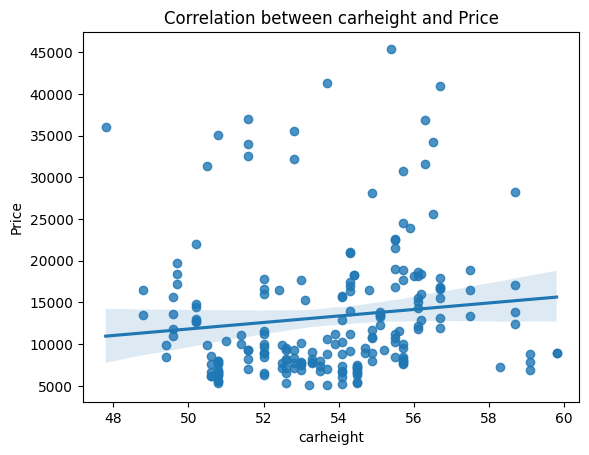

In [ ]:
sns.regplot(x='carheight', y='price', data=car_prices)

# Set plot title and labels
plt.title('Correlation between carheight and Price')
plt.xlabel('carheight')
plt.ylabel('Price')

# Show plot
plt.show()

# Seaborn joinplot function (Before removing outlier data)

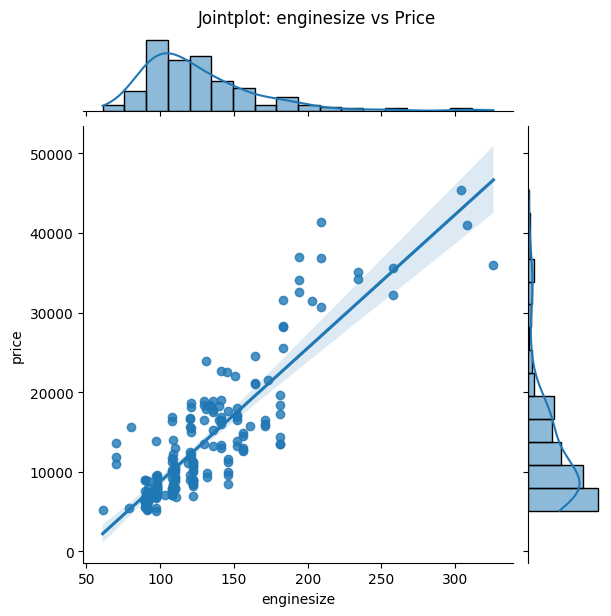

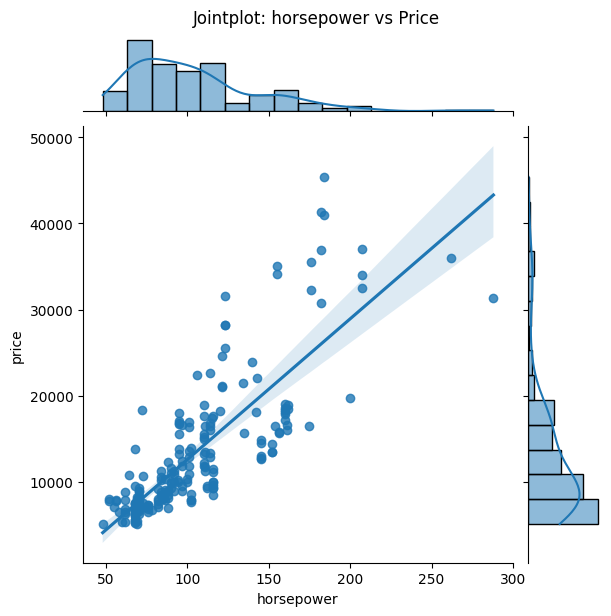

In [ ]:
# Create jointplots to visualize relationship between features and price
sns.jointplot(x='enginesize', y='price', data=car_prices, kind='reg')
plt.suptitle('Jointplot: enginesize vs Price', y=1.02)

sns.jointplot(x='horsepower', y='price', data=car_prices, kind='reg')
plt.suptitle('Jointplot: horsepower vs Price', y=1.02)

# Show the jointplots
plt.show()

# Exploring outliers

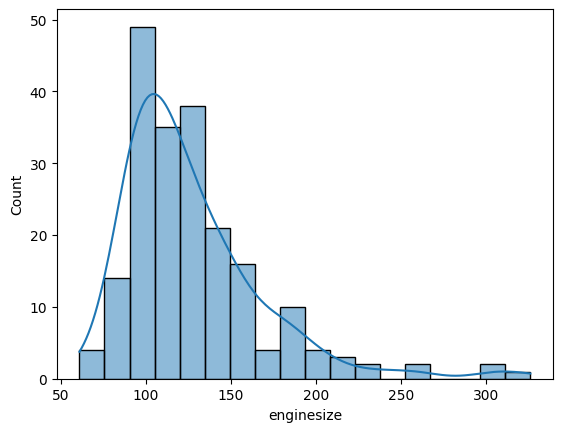

skew 1.9476550452788108


In [ ]:
sns.histplot(car_prices['enginesize'], kde=True)
plt.show()
print("skew",car_prices['enginesize'].skew() )



# plt.figure(figsize=(12, 6))

# plt.subplot(1, 2, 1)
# sns.regplot(x='enginesize', y='price', data=car_prices)
# plt.title('Correlation between enginesize and Price')

# plt.subplot(1, 2, 2)
# sns.regplot(x='horsepower', y='price', data=car_prices)
# plt.title('Correlation between horsepower and Price')

# plt.tight_layout()

# # Show the plots
# plt.show()

# # Create jointplots to visualize relationship between features and price
# sns.jointplot(x='enginesize', y='price', data=car_prices, kind='reg')
# plt.suptitle('Jointplot: enginesize vs Price', y=1.02)

# sns.jointplot(x='horsepower', y='price', data=car_prices, kind='reg')
# plt.suptitle('Jointplot: horsepower vs Price', y=1.02)

# # Show the jointplots
# plt.show()

# Selecting the K best (Most influencial) features

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

train_cols = index_labels
selector = SelectKBest(f_regression, k=10)
Reconstruct_Data_Kbest = selector.fit_transform(Reconstruct_features[train_cols], price_column)

# Get the selected feature indexes
selected_feature_indexes = selector.get_support(indices=True)

# Get the selected feature names
selected_feature_names = [train_cols[i] for i in selected_feature_indexes]
print(selected_feature_names)

['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 'horsepower', 'citympg', 'highwaympg', 'drivewheel']


# Splitting the data into test and train

In [ ]:
## Part C-1. Splitting data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(Reconstruct_Data_Kbest, price_column, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((143, 10), (62, 10), (143,), (62,))

# Implementing Linear, Lasso, and Ridge regression models as well as SVR (First try, without Normalization)

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, Y_train)
linear_pred = linear_reg.predict(X_test)
linear_rmse = mean_squared_error(Y_test, linear_pred, squared=False)
print("Linear Regression RMSE:", linear_rmse)

# Lasso Regression
lasso_reg = Lasso(alpha=1)  # You can adjust the alpha parameter
lasso_reg.fit(X_train, Y_train)
lasso_pred = lasso_reg.predict(X_test)
lasso_rmse = mean_squared_error(Y_test, lasso_pred, squared=False)
print("Lasso Regression RMSE:", lasso_rmse)

# Ridge Regression
ridge_reg = Ridge(alpha=1)  # You can adjust the alpha parameter
ridge_reg.fit(X_train, Y_train)
ridge_pred = ridge_reg.predict(X_test)
ridge_rmse = mean_squared_error(Y_test, ridge_pred, squared=False)
print("Ridge Regression RMSE:", ridge_rmse)

# Support Vector Regression (SVR)
svr_reg = SVR(kernel='linear')  # You can choose different kernels
svr_reg.fit(X_train, Y_train)
svr_pred = svr_reg.predict(X_test)
svr_rmse = mean_squared_error(Y_test, svr_pred, squared=False)
print("SVR RMSE:", svr_rmse)

linear_r2 = r2_score(Y_test, linear_pred)
lasso_r2 = r2_score(Y_test, lasso_pred)
ridge_r2 = r2_score(Y_test, ridge_pred)
svr_r2 = r2_score(Y_test, svr_pred)


print("Linear Regression R2 Score:", linear_r2)
print("Lasso Regression R2 Score:", lasso_r2)
print("Ridge Regression R2 Score:", ridge_r2)
print("SVR R2 Score:", svr_r2)


Linear Regression RMSE: 3918.0948689786624
Lasso Regression RMSE: 3918.1338951289217
Ridge Regression RMSE: 3919.6710321310243
SVR RMSE: 3937.464011410607
Linear Regression R2 Score: 0.778428157832707
Lasso Regression R2 Score: 0.7784237438818664
Ridge Regression R2 Score: 0.7782498550455885
SVR R2 Score: 0.7762320576166618
